<a href="https://colab.research.google.com/github/divyansh-ag-03/IAIML/blob/main/IAIML_Experiment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
url  = "https://raw.githubusercontent.com/divyansh-ag-03/IAIML/main/Datasets/CAR%20DETAILS%20FROM%20CAR%20DEKHO.csv"
CarDekho = pd.read_csv(url)

In [ ]:
# Display the first 5 rows
CarDekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
CarDekho.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
X = CarDekho.iloc[:, :-1]    # independent varible
y = CarDekho.iloc[:, -1]     # dependent variable

X.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual


In [ ]:
# Putting feature variable to X
X = CarDekho[['year', 'km_driven']]
X.head()

,year,km_driven
0,2007,70000
1,2007,50000
2,2012,100000
3,2017,46000
4,2014,141000


In [ ]:
# Putting response variable to y
y = CarDekho['selling_price']
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [ ]:
onehot = pd.get_dummies(CarDekho[['transmission', 'fuel']], drop_first=True)

In [ ]:
onehot

,transmission_Manual,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
0,1,0,0,0,1
1,1,0,0,0,1
2,1,1,0,0,0
3,1,0,0,0,1
4,1,1,0,0,0
...,...,...,...,...,...
4335,1,1,0,0,0
4336,1,1,0,0,0
4337,1,0,0,0,1
4338,1,1,0,0,0


In [ ]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=0000)

In [ ]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [ ]:
# Step 7: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 278672440969.3765
R-squared: 0.18268362565102858


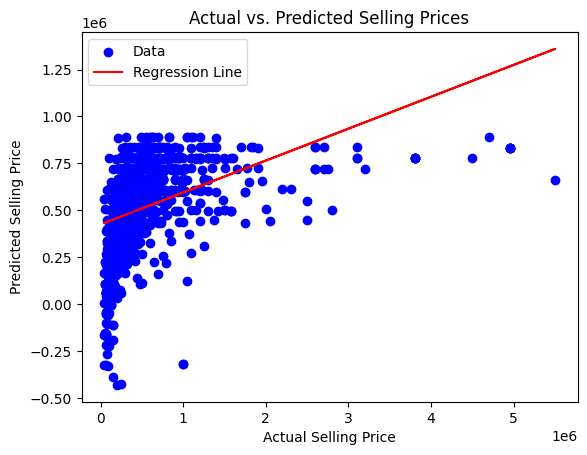

In [ ]:
plt.scatter(y_test, y_pred, color='blue', label='Data')
plt.title('Actual vs. Predicted Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')

regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', label='Regression Line')

plt.legend()
plt.show()